# Hemocell One Cell Shear Simulation UQ Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from local_config import *

## Read data and results

In [2]:
# Load results from posterior sampling
sample_df = pd.read_csv("hemocell_samples_normal_3_12.csv",sep=";")
qoi = np.load("hemocell_qoi_normal_3_12.npy")

# Load data for comparison with results
data = pd.read_csv("%s/Ekcta_100.csv" % (datapath),sep=";")
data = data.loc[data["Treatment"] == 0.5]
stress,el,el_err = data.values[3:12,[1,3,4]].T

# Parameter names
params = ["kLink","kBend","model_uncertainty"]
#params = ["kLink","kBend","viscosityRatio","model_uncertainty"]

In [3]:
print(data)
print(sample_df)

    Treatment  Stress (pa)  EL Healthy  EL 100%  EL error (+/-)
45        0.5         0.30       0.038    0.119           0.015
46        0.5         0.44       0.077    0.050           0.004
47        0.5         0.64       0.151    0.031           0.003
48        0.5         0.93       0.196    0.063           0.004
49        0.5         1.36       0.268    0.128           0.004
50        0.5         1.99       0.332    0.190           0.003
51        0.5         2.91       0.389    0.251           0.005
52        0.5         4.24       0.441    0.321           0.004
53        0.5         6.19       0.485    0.384           0.003
54        0.5         9.04       0.521    0.440           0.003
55        0.5        13.20       0.549    0.487           0.002
56        0.5        19.28       0.576    0.523           0.004
57        0.5        28.15       0.598    0.554           0.002
58        0.5        41.10       0.620    0.581           0.002
59        0.5        60.00       0.639  

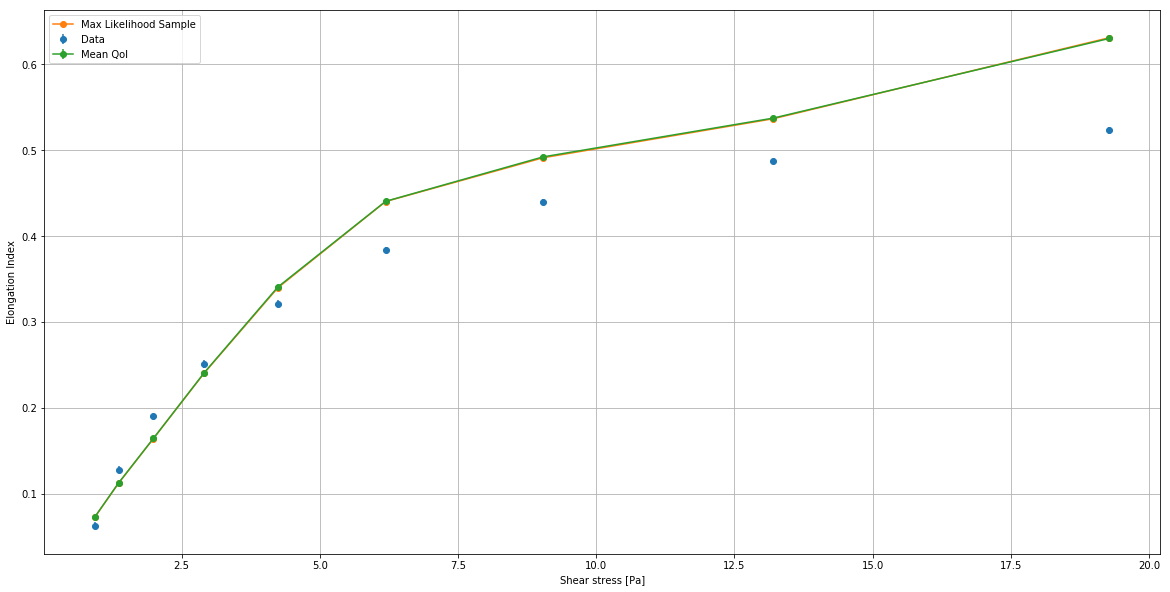

In [4]:
plt.figure(figsize=(20,10))
plt.xlabel("Shear stress [Pa]")
plt.ylabel("Elongation Index")

plt.grid(True)

# Data
plt.errorbar(stress,el,yerr=el_err,fmt="o",label="Data")

# Highest likelihood
mle = np.argmax(sample_df["likelihood"].values)
plt.plot(stress,qoi[mle],"o-",label="Max Likelihood Sample")

# Mean QoI output
mean = np.mean(qoi,axis=0)
var = np.sum((qoi - mean[None,:])**2,axis=0) / (qoi.shape[0] - 1)
conf = 1.96 * np.sqrt(var / qoi.shape[0])

plt.errorbar(stress,mean,yerr=conf,fmt="o-",label="Mean QoI")

plt.legend()

plt.show()

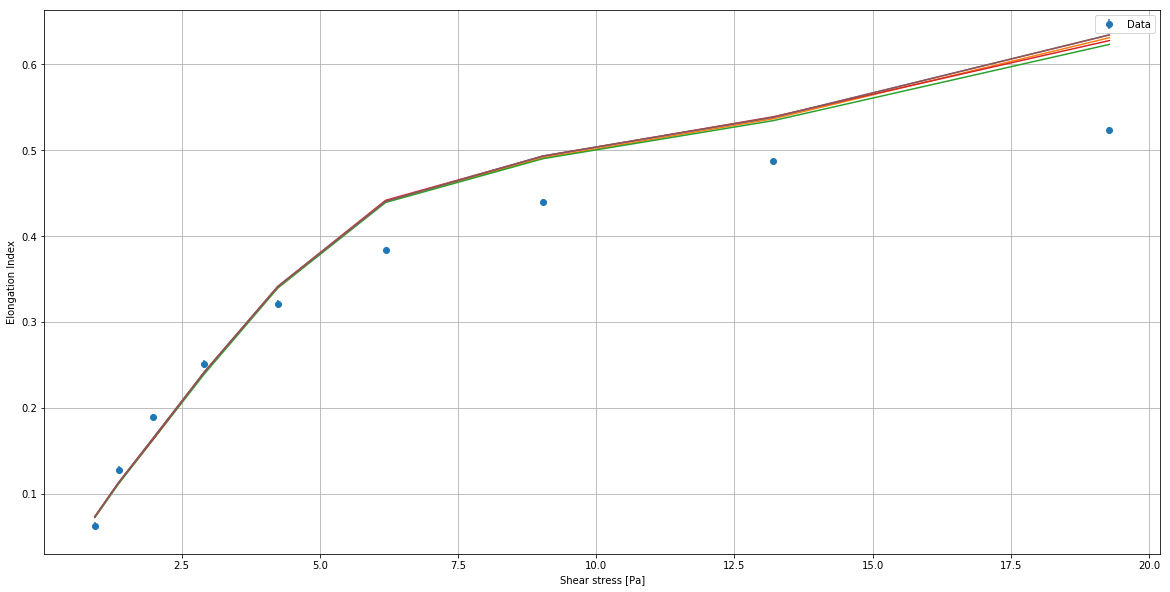

In [8]:
plt.figure(figsize=(20,10))
plt.xlabel("Shear stress [Pa]")
plt.ylabel("Elongation Index")

plt.grid(True)

# Data
plt.errorbar(stress,el,yerr=el_err,fmt="o",label="Data")

# Plot all qoi
for n in range(qoi.shape[0]):
    plt.plot(stress,qoi[n])

plt.legend()

plt.show()

## Plot parameter histograms

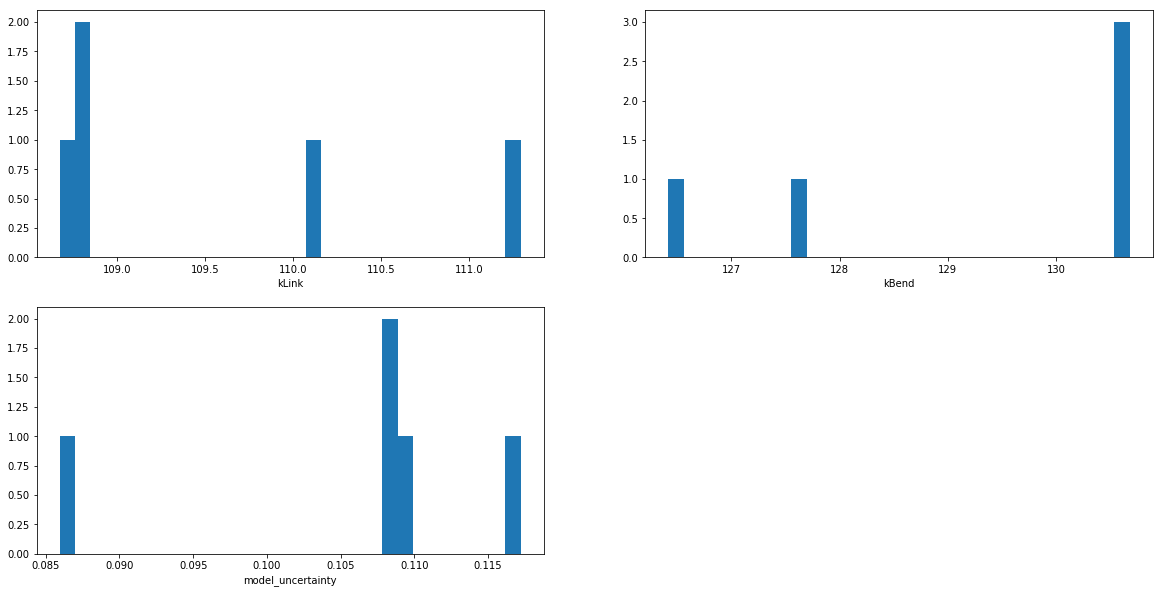

In [6]:
nbins = 30
plt.figure(figsize=(20,10))
for n in range(len(params)):
    plt.subplot(2,2,n+1)
    plt.xlabel(params[n])
    plt.hist(sample_df[params[n]].values,bins=nbins)

plt.show()

## Plot parameters against each other in 2D

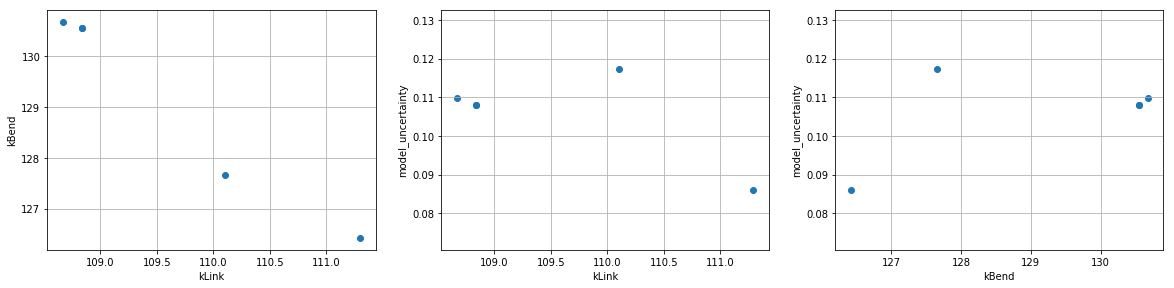

In [7]:
plt.figure(figsize=(20,15))

count = 1
for n in range(len(params)):
    for m in range(n,len(params)):
        if n != m:
            plt.subplot(3,3,count)
            plt.grid(True)
            plt.xlabel(params[n])
            plt.ylabel(params[m])
            plt.scatter(sample_df[params[n]].values,sample_df[params[m]].values)
            count += 1

plt.show()